In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Datasets/Position_Salaries.csv')
data.sample(5)

,Position,Level,Salary
5,Region Manager,6,150000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
8,C-level,9,500000


In [2]:
data.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [3]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3)
X_poly = poly_features.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [11]:
import statsmodels.regression.linear_model as sm

ols_X = sm.OLS(endog = y, exog = X).fit()
ols_X.summary()

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              27.88
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    0.000507
Time:                        14:56:05   Log-Likelihood:                         -135.56
No. Observations:                  10   AIC:                                      273.1
Df Residuals:                       9   BIC:                                      273.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.297e+04      1e+04      5.281      0.001    3.03e+04    7.57e+04
==============================================================================
Omnibus:                       20.006   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.131
Skew:                           2.116   Prob(JB):                      0.00232
Kurtosis:                       6.346   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
ols_X_poly = sm.OLS(endog = y, exog = X_poly).fit()
ols_X_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     104.4
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.44e-05
Time:                        14:56:21   Log-Likelihood:                -119.88
No. Observations:                  10   AIC:                             247.8
Df Residuals:                       6   BIC:                             249.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.213e+05   9.75e+04     -1.244      0.260    -3.6e+05    1.17e+05
x1          1.807e+05   7.31e+04      2.471      0.048    1759.690     3.6e+05
x2         -4.855e+04   1.51e+04     -3.219      0.018   -8.55e+04   -1.16e+04
x3          4120.0466    904.338      4.556      0.004    1907.212    6332.881
==============================================================================
Omnibus:                        0.742   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.690   Jarque-Bera (JB):                0.664
Skew:                          -0.420   Prob(JB):                        0.718
Kurtosis:                       2.057   Cond. No.                     3.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X_poly = X_poly[:, 1:]
X_poly

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.],
       [   6.,   36.,  216.],
       [   7.,   49.,  343.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.]])

In [14]:
from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

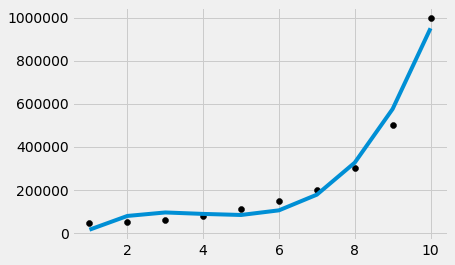

In [15]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X, y, color = 'k')
plt.plot(X, poly_reg.predict(X_poly))
plt.show()